# Visualizações dos dados de covid para a cidade de cajamar

In [90]:
import pandas as pd
import seaborn as sns

from covid_cajamar.config import settings

In [91]:
covid_data = pd.read_csv("../data/interim/covid_data.csv")
covid_data_pre_disease = pd.read_csv("../data/interim/covid_data_pre_disease.csv")

In [92]:
covid_data.head()

,nome_munic,codigo_ibge,datahora,casos,casos_mm7d,obitos,obitos_mm7d,letalidade
0,Cajamar,3509205,2020-02-25,0,0.0,0,0.0,0.0
1,Cajamar,3509205,2020-02-26,0,0.0,0,0.0,0.0
2,Cajamar,3509205,2020-02-27,0,0.0,0,0.0,0.0
3,Cajamar,3509205,2020-02-28,0,0.0,0,0.0,0.0
4,Cajamar,3509205,2020-02-29,0,0.0,0,0.0,0.0


In [93]:
covid_data_pre_disease = covid_data_pre_disease.infer_objects()

In [94]:
covid_data_pre_disease.head()

,nome_munic,codigo_ibge,idade,diagnostico_covid19,data_inicio_sintomas,obito
0,Cajamar,3509205,43.0,CONFIRMADO,2020-07-16,0
1,Cajamar,3509205,56.0,CONFIRMADO,2020-07-01,0
2,Cajamar,3509205,28.0,CONFIRMADO,2020-08-12,0
3,Cajamar,3509205,55.0,CONFIRMADO,2020-09-13,1
4,Cajamar,3509205,36.0,CONFIRMADO,2021-02-07,0


In [125]:
covid_data_pre_disease["faixa_etaria"] = pd.cut(covid_data_pre_disease.idade, bins=4).astype(str)

## qual o cenário da média movel (7d) de novos casos?

<AxesSubplot:xlabel='datahora', ylabel='casos_mm7d'>

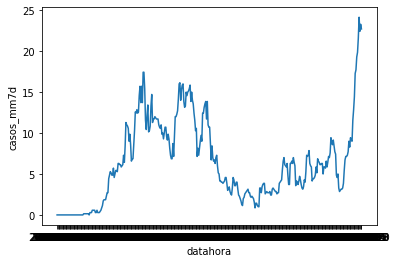

In [126]:
sns.lineplot(x="datahora", y="casos_mm7d", data=covid_data)

## qual o cenario da média movel (7d) de obitos?

<AxesSubplot:xlabel='datahora', ylabel='obitos'>

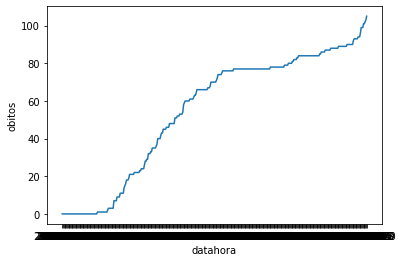

In [127]:
sns.lineplot(x="datahora", y="obitos", data=covid_data)

## qual a distribuição de casos por idade?

In [128]:
grouped = covid_data_pre_disease.groupby(["faixa_etaria", "obito"]).agg({"codigo_ibge": "count"}).reset_index().rename(columns={"codigo_ibge": "contagem"})
# sns.lineplot(x="data_inicio_sintomas", y="obitos", data=covid_data)

<AxesSubplot:xlabel='faixa_etaria', ylabel='contagem'>

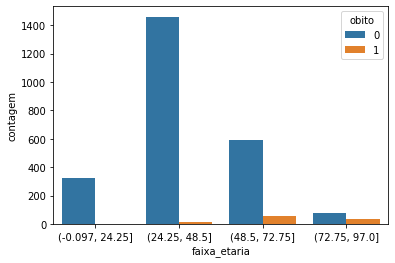

In [129]:
sns.barplot(x="faixa_etaria", y="contagem", hue="obito", data=grouped)

## como é a evolução temporal de novos casos por faixa etaria?

In [130]:
covid_data_pre_disease

,nome_munic,codigo_ibge,idade,diagnostico_covid19,data_inicio_sintomas,obito,faixa_etaria,mes_ano
0,Cajamar,3509205,43.0,CONFIRMADO,2020-07-16,0,"(24.25, 48.5]",2020-07
1,Cajamar,3509205,56.0,CONFIRMADO,2020-07-01,0,"(48.5, 72.75]",2020-07
2,Cajamar,3509205,28.0,CONFIRMADO,2020-08-12,0,"(24.25, 48.5]",2020-08
3,Cajamar,3509205,55.0,CONFIRMADO,2020-09-13,1,"(48.5, 72.75]",2020-09
4,Cajamar,3509205,36.0,CONFIRMADO,2021-02-07,0,"(24.25, 48.5]",2021-02
...,...,...,...,...,...,...,...,...
2555,Cajamar,3509205,30.0,CONFIRMADO,2020-12-30,0,"(24.25, 48.5]",2020-12
2556,Cajamar,3509205,51.0,CONFIRMADO,2021-02-18,0,"(48.5, 72.75]",2021-02
2557,Cajamar,3509205,19.0,CONFIRMADO,2020-12-02,0,"(-0.097, 24.25]",2020-12
2558,Cajamar,3509205,40.0,CONFIRMADO,2020-06-30,0,"(24.25, 48.5]",2020-06


In [131]:
covid_data_pre_disease["data_inicio_sintomas"] = pd.to_datetime(covid_data_pre_disease["data_inicio_sintomas"])
covid_data_pre_disease["mes_ano"] = covid_data_pre_disease["data_inicio_sintomas"].dt.to_period("M").astype("str")

In [132]:
covid_data_pre_disease.head()

,nome_munic,codigo_ibge,idade,diagnostico_covid19,data_inicio_sintomas,obito,faixa_etaria,mes_ano
0,Cajamar,3509205,43.0,CONFIRMADO,2020-07-16,0,"(24.25, 48.5]",2020-07
1,Cajamar,3509205,56.0,CONFIRMADO,2020-07-01,0,"(48.5, 72.75]",2020-07
2,Cajamar,3509205,28.0,CONFIRMADO,2020-08-12,0,"(24.25, 48.5]",2020-08
3,Cajamar,3509205,55.0,CONFIRMADO,2020-09-13,1,"(48.5, 72.75]",2020-09
4,Cajamar,3509205,36.0,CONFIRMADO,2021-02-07,0,"(24.25, 48.5]",2021-02


In [133]:
grouped = covid_data_pre_disease.groupby(["faixa_etaria", "mes_ano"]).agg({"diagnostico_covid19": "count"}).reset_index()
grouped["diagnostico_covid19_cumsum"] = grouped.groupby("faixa_etaria")["diagnostico_covid19"].cumsum()

<AxesSubplot:xlabel='mes_ano', ylabel='diagnostico_covid19_cumsum'>

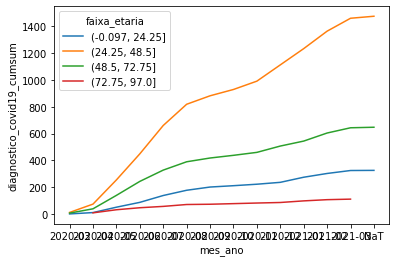

In [134]:
sns.lineplot(x="mes_ano", y="diagnostico_covid19_cumsum", hue="faixa_etaria", data=grouped)

## como é a evolução de obitos por faixa etaria?

<AxesSubplot:xlabel='mes_ano', ylabel='obitos_cumsum'>

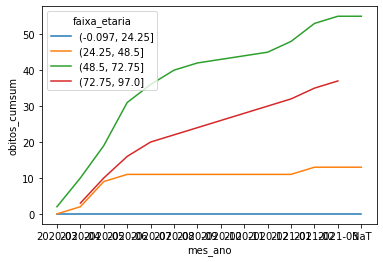

In [135]:
grouped = covid_data_pre_disease.groupby(["faixa_etaria", "mes_ano"]).agg({"obito": "sum"}).reset_index()
grouped["obitos_cumsum"] = grouped.groupby("faixa_etaria")["obito"].cumsum()
sns.lineplot(x="mes_ano", y="obitos_cumsum", hue="faixa_etaria", data=grouped)